Group 4 members:
1. Narayan Badri S
2. Neha Kasangotu
3. Siri Dhathrika
4. Yash Shrivastava

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [171]:
worksheet = gc.open('Cancer_Dataset_Infy').sheet1
print (worksheet)

<Worksheet 'Sheet1' id:0>


In [172]:
dataset = worksheet.get_all_values()
print(dataset)
data = pd.DataFrame(dataset[1:], columns=dataset[0])  # Assuming the first row is the header

[['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'], ['P1', '33', '1', '2', '4', '5', '4', '3', '2', '2', '4', '3', '2', '2', '4', '3', '4', '2', '2', '3', '1', '2', '3', '4', 'Low'], ['P10', '17', '1', '3', '1', '5', '3', '4', '2', '2', '2', '2', '4', '2', '3', '1', '3', '7', '8', '6', '2', '1', '7', '2', 'Medium'], ['P100', '35', '1', '4', '5', '6', '5', '5', '4', '6', '7', '2', '3', '4', '8', '8', '7', '9', '2', '1', '4', '6', '7', '2', 'High'], ['P1000', '37', '1', '7', '7', '7', '7', '6', '7', '7', '7', '7', '7', '7', '8', '4', '2', '3', '1', '4', '5', '6', '7', '5', 'High'], ['P101', '46', '1', '6', '8', '7', '7', '7', '6', '7', '7', '8'

In [173]:
count_column = data.shape[1]
count_row = data.shape[0]
print("Number of columns:")
print(count_column)
print("Number of Rows:")
print(count_row)

Number of columns:
25
Number of Rows:
1000


In [174]:
data.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
data.rename(columns=str.lower, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)

# Display Data After Cleaning
display(data)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [175]:
# Changing name of data to df
df = data
display(df)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [176]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   object
 1   gender                    1000 non-null   object
 2   air_pollution             1000 non-null   object
 3   alcohol_use               1000 non-null   object
 4   dust_allergy              1000 non-null   object
 5   occupational_hazards      1000 non-null   object
 6   genetic_risk              1000 non-null   object
 7   chronic_lung_disease      1000 non-null   object
 8   balanced_diet             1000 non-null   object
 9   obesity                   1000 non-null   object
 10  smoking                   1000 non-null   object
 11  passive_smoker            1000 non-null   object
 12  chest_pain                1000 non-null   object
 13  coughing_of_blood         1000 non-null   object
 14  fatigue                  

In [177]:
# Convert relevant columns to numeric, handling errors
for col in data.columns:
    if col not in ['level']:  # Exclude non-numeric columns
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce') #'coerce' set invalid parsing to NaN
        except:
            print(f"Could not convert column '{col}' to numeric.")
# Display info to confirm data type changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [178]:
# Binning and Discretization -> Pollution
bins = [0, 3, 6, 8]
labels = ['low_Pollution_areas', 'medium_Pollution_areas', 'high_Pollution_areas']
df['air_pol'] = pd.cut(df['air_pollution'], bins=bins, labels=labels, right=True)

In [179]:
print(df[['air_pollution', 'air_pol']].head())

   air_pollution                 air_pol
0              2     low_Pollution_areas
1              3     low_Pollution_areas
2              4  medium_Pollution_areas
3              7    high_Pollution_areas
4              6  medium_Pollution_areas


In [180]:
# Checking the actual column names in your DataFrame
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level', 'air_pol'],
      dtype='object')


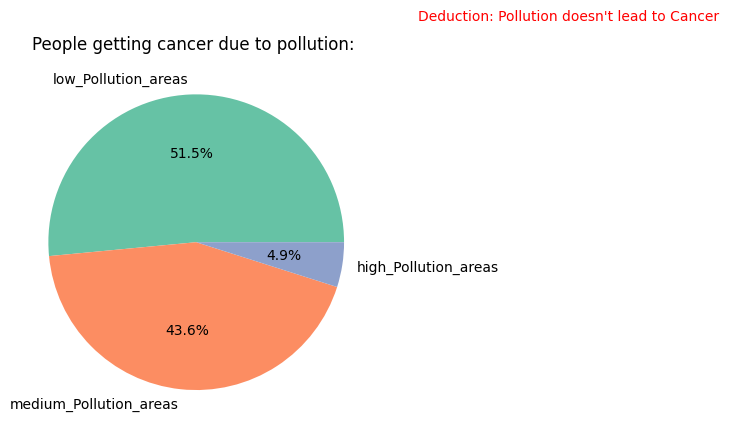

In [181]:
category_counts = df['air_pol'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(category_counts)))
plt.title('People getting cancer due to pollution: ')
plt.text(1.5, 1.5, "Deduction: Pollution doesn't lead to Cancer", color = "red")
plt.show()

In [182]:
# Discreting to Male and Female  - Gender
bins = [0,1,2]
labels = ['Male', 'Female']
df['gen'] = pd.cut(df['gender'], bins=bins, labels=labels, right=True)

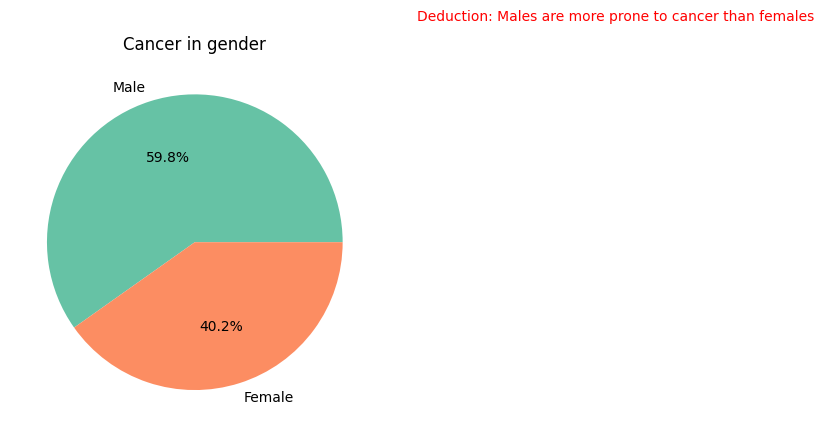

In [183]:
category_counts = df['gen'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(category_counts)))
plt.title('Cancer in gender')
plt.text(1.5, 1.5, "Deduction: Males are more prone to cancer than females", color = "red")
plt.show()

In [184]:
# Cleaning Age Data in DataFrame
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])
bins = [0,18,30,40,60,80,100]
labels = ['Young_Children(0-18)', 'Young_adults (19-30)', 'Adults (31-40)',
          'Senior_Adults(41-60)', 'Senior_Citizen(60-80)', 'Older_than_80years']
df['ag'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

<ipython-input-185-f8aa9da2a47c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set2")


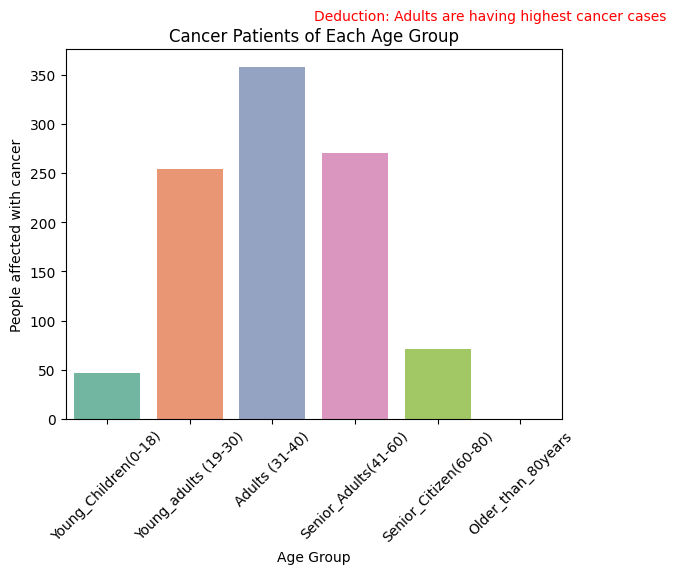

In [185]:
age_group_counts = df['ag'].value_counts()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set2")
plt.title('Cancer Patients of Each Age Group')
plt.text(2.5, 405.5, "Deduction: Adults are having highest cancer cases", color = "red")
plt.xlabel('Age Group')
plt.ylabel('People affected with cancer')
plt.xticks(rotation=45)
plt.show()

In [186]:
# Categorizing Smoking Levels in DataFrame
bins = [0,3,6,8]
labels = ['Low_Smoking', 'Average_Smoking','Chainsmokers']
df['smokers'] = pd.cut(df['smoking'], bins=bins, labels=labels, right=True)

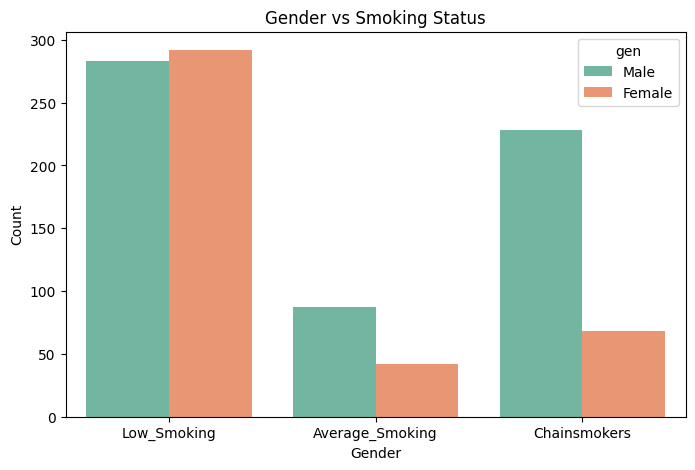

In [187]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smokers', hue='gen', palette='Set2')
plt.title('Gender vs Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

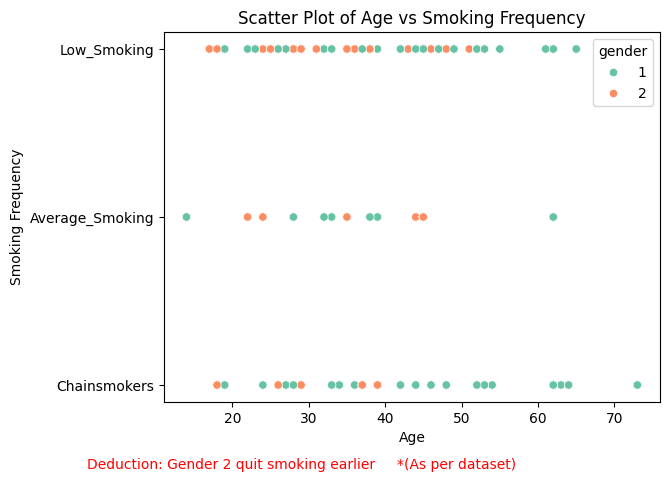

In [188]:
# Scatter PLot
category_counts = df['gen'].value_counts()
sns.scatterplot(data=df, x='age', y='smokers', hue='gender', palette='Set2')
plt.text(1.0, 2.5, "Deduction: Gender 2 quit smoking earlier     *(As per dataset)", color = "red")
plt.title('Scatter Plot of Age vs Smoking Frequency')
plt.xlabel('Age')
plt.ylabel('Smoking Frequency')
plt.show()

In [189]:
# Checking the actual column names in our DataFrame
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level', 'air_pol', 'gen',
       'ag', 'smokers'],
      dtype='object')


 K-Nearest Neighbors (KNN) algorithm

In [234]:
#  K-Nearest Neighbors (KNN) algorithm

In [235]:
# We are selecting specific columns from the DataFrame
# X = df[['age', 'gender','passive_smoker', 'alcohol_use', 'dust_allergy','occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
#        'balanced_diet', 'obesity', 'smoking','chest_pain',
#        'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
#        'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
#        'frequent_cold', 'dry_cough', 'snoring','air_pollution']]

# Efficient Way -> x= df.drop (columns = "air_pollution")
X = df.drop(columns=['level', 'air_pol', 'gen', 'ag', 'smokers'])
y = df['level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [236]:
# Checking the shape of X_train and X_test
X_train.shape, X_test.shape

((800, 23), (200, 23))

In [237]:
X_train.dtypes

,0
age,int64
gender,int64
air_pollution,int64
alcohol_use,int64
dust_allergy,int64
occupational_hazards,int64
genetic_risk,int64
chronic_lung_disease,int64
balanced_diet,int64
obesity,int64


In [239]:
# High Mutual Information means  feature is very informative
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.DataFrame({'Feature':X_train.columns, 'Mutual Information': mutual_info})
mutual_info = mutual_info.sort_values(by='Mutual Information', ascending=False)
mutual_info

,Feature,Mutual Information
11,passive_smoker,0.622382
13,coughing_of_blood,0.577106
3,alcohol_use,0.545540
17,wheezing,0.512103
9,obesity,0.509351
12,chest_pain,0.495240
8,balanced_diet,0.485084
4,dust_allergy,0.461830
10,smoking,0.426118
5,occupational_hazards,0.418032


In [240]:
# From the above part we can observe that passive_smoker and coughing_of_blood are having high MI -> More informative features

In [241]:
# Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [242]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [243]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [244]:
y_pred = knn.predict(X_test)
y_pred

array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Low', 'High', 'Medium', 'Low', 'Low', 'High', 'High', 'Medium',
       'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'High', 'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium', 'Low',
       'Low', 'High', 'Low', 'Low', 'Medium', 'High', 'High', 'Medium

In [245]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 1.0000


In [246]:
y_pred_train = knn.predict(X_train)

In [247]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [248]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [249]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of KNN model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of KNN model: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [250]:
# Testing for different values of K
k_values = range(1, 18)
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))


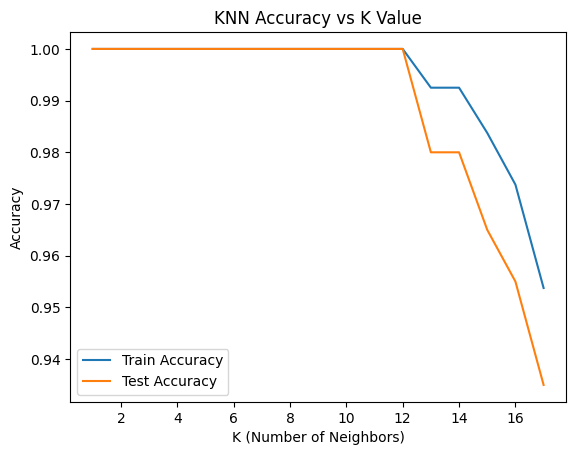

In [251]:
# Accuracy with respect to values of K
plt.plot(k_values, train_accuracies, label="Train Accuracy")
plt.plot(k_values, test_accuracies, label="Test Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.legend()
plt.show()

In [254]:
# Checking the actual column names in our DataFrame
print(df.columns)

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level', 'air_pol', 'gen',
       'ag', 'smokers'],
      dtype='object')


In [256]:
# Now Taking features having high MI.

# We are taking passive_smoker and coughing_of_blood	as the features only.
X = df[['passive_smoker', 'coughing_of_blood']]
Y = df['level']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [257]:
# Checking the shape of X_train and X_test
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [258]:
# Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [259]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [260]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=4)
# fit the model to the training set
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [261]:
Y_pred = knn.predict(X_test)
Y_pred

array(['High', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'Medium', 'Low', 'Medium', 'High', 'High', 'High',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Medium', 'High',
       'Low', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Low', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'High', 'Medium', 'High', 'Medium', 'Low',
       'High', 'Medium', 'Medium', 'Low', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Medium', 'Medium', 'Low', 'High', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'Low', 'High',
       'High', 'Medium', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Low', 'High', 'Medium', 'Hig

In [262]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.9400


In [263]:
Y_pred_train = knn.predict(X_train)

In [264]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

Training-set accuracy score: 0.9387


In [265]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.9387
Test set score: 0.9400


In [266]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy of KNN model:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy of KNN model: 0.94

Classification Report:
               precision    recall  f1-score   support

        High       0.99      1.00      0.99        75
         Low       0.98      0.84      0.90        67
      Medium       0.85      0.98      0.91        58

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200


Confusion Matrix:
 [[75  0  0]
 [ 1 56 10]
 [ 0  1 57]]


In [267]:
# Testing for different values of K
k_values = range(1, 18)
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    train_accuracies.append(accuracy_score(Y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(Y_test, knn.predict(X_test)))


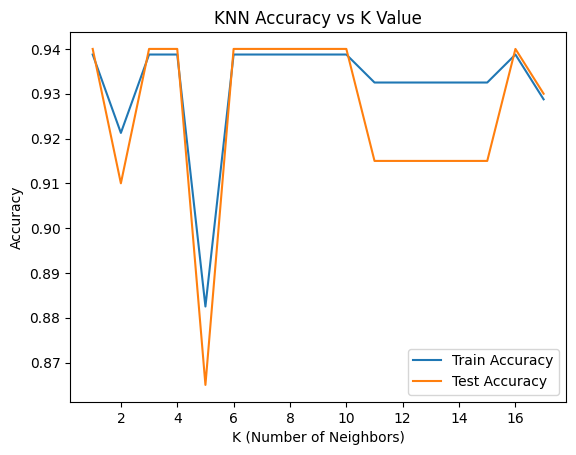

In [268]:
# Accuracy with respect to values of K
plt.plot(k_values, train_accuracies, label="Train Accuracy")
plt.plot(k_values, test_accuracies, label="Test Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.legend()
plt.show()

# Earlier we have taken k = 3 , after the graph k = 4.

RANDOM FOREST CLASSIFIER

In [ ]:
a= df[['alcohol_use', 'occupational_hazards']]
b = df['air_pollution']
a_train, a_test, b_train, b_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [ ]:
# Checking the shape of X_train and X_test
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
# Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, Y_train)

# Predict the Test set results
Y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with decision-trees : 0.8200


In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
rfc_100.fit(X_train, Y_train)

# Predict on the test set results
Y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8200


In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
alcohol_use,0.5836
occupational_hazards,0.4164


In [ ]:
# acohol_use is more important feature.

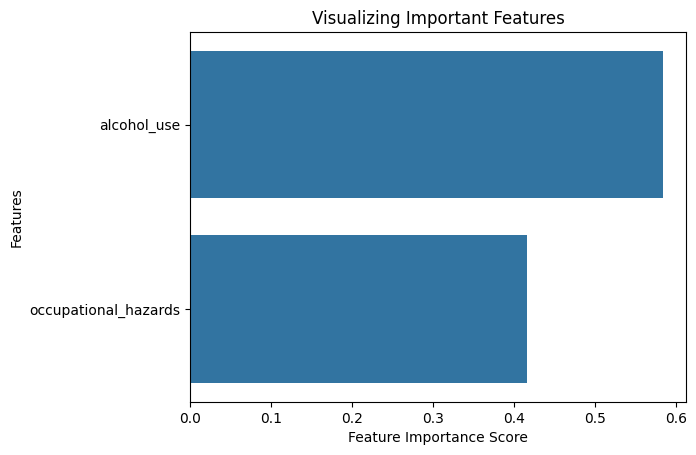

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores.values, y=feature_scores.index.get_level_values(0))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        32
           2       0.78      0.93      0.85        42
           3       0.75      0.75      0.75        36
           4       0.82      0.75      0.78        24
           5       0.00      0.00      0.00         2
           6       0.87      0.93      0.90        56
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         5

    accuracy                           0.82       200
   macro avg       0.51      0.53      0.52       200
weighted avg       0.78      0.82      0.80       200

